In [41]:
#import libraries...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
# import data

sms = pd.read_csv("SMSSpamCollection.csv", 
                 sep = '\t', names = ['label', 'message'])

In [43]:
sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


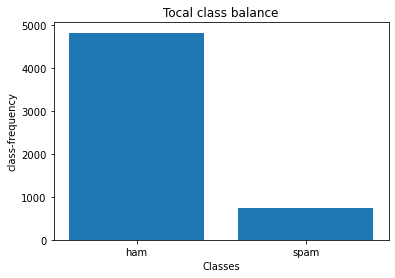

In [44]:
cls, ncls = np.unique(sms['label'], return_counts = True)    #class imbalance
plt.bar(x = cls, height = ncls)
plt.title("Tocal class balance")
plt.xlabel("Classes")
plt.ylabel("class-frequency")
plt.show()

In [45]:
messages = sms['message']

In [46]:
# lower all caps to small case

low_case_message = []

for l in range(len(messages)):
    
    low_case_message.append(sms['message'][l].lower())

In [47]:
low_case_message

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had you

In [48]:
# remove all punctuations

def Punctuator(words):
    punctuations = '''~`@#$%^&*()_-+=/*,-.[]{};:’"'"<>?\|1234567890]'''
    word_join = []
    for t in words:
        for p in punctuations:
            if (p in t):
                t = t.replace(p, '')
        word_join.append(t)
    return(word_join)

In [49]:
sentence = Punctuator(low_case_message)

In [50]:
sentence[4]

'nah i dont think he goes to usf he lives around here though'

In [51]:
low_case_message[4]

"nah i don't think he goes to usf, he lives around here though"

In [52]:
# sentences to words

sentence_word = []

for l in range(len(sentence)):
    
    sentence_word.append(nltk.word_tokenize(sentence[l]))

In [53]:
len(sentence_word)

5572

In [54]:
# stemming
ps = PorterStemmer()

In [55]:
ps_words = []   #use the words without puncatuations
for l in range(len(sentence_word)):
    word = []
    for w in sentence_word[l]:
        word.append(ps.stem(w))
    ps_words.append(' '.join(word))

In [56]:
cv =  CountVectorizer()

In [57]:
X = cv.fit_transform(ps_words).toarray()   #word to vector

In [58]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
X.shape

(5572, 7194)

In [60]:
Y = np.where(sms['label'] == 'ham', -1, 1).reshape(-1, 1)  #ham=-1 and spam=1
Y

array([[-1],
       [-1],
       [ 1],
       ...,
       [-1],
       [-1],
       [-1]])

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, shuffle = True)    #data split

In [62]:
class AdalinePerceptron:
    
    def __init__(self, epochs, lr, initialize, random_state):
        self.epoch = epochs
        self.lr = lr
        self.initialize = initialize
        self.random_state = random_state
     
    def activation_fn(self, z):
        pred = 1/(1+np.exp(-z))
        return (pred)
    
    def gradient(self, y_p):
        grad = np.multiply(y_p, (1-y_p))
        grad = np.multiply(grad, self.xtrain)
        return (grad)
    
    def label(self, pr):
        pred = []
        for p in pr:
            if p >=0.5:
                pred.append(1)
            else:
                pred.append(-1)
        return (np.asarray(pred).reshape(-1,1))
        
    def train(self, xtrain, ytrain):
        self.xtrain = xtrain
        self.ytrain = ytrain
        self.accuracy = []
        np.random.seed(self.random_state)
        if (self.initialize == 'zero'):
            self.W = np.zeros(shape = (self.xtrain.shape[1], 1))
        elif (self.initialize == 'random'):
            self.W = np.random.rand(self.xtrain.shape[1], 1)
        for sim in range(self.epoch):
            Z = np.dot(self.xtrain, self.W)
            yp = self.activation_fn(Z)
            error = self.ytrain-yp
            grd = self.gradient(yp)
            self.W = self.W + self.lr*(np.dot(grd.T, error))
            self.accuracy.append(accuracy_score(ytrain, self.label(yp)))
        return
    
    def predict(self, xtest):
        self.xtest = xtest
        test_pred = np.dot(self.xtest,self.W)
        cls_pred = self.activation_fn(test_pred)
        cls_label = self.label(cls_pred)
        return(cls_label)    

In [63]:
#model
percep = AdalinePerceptron(100, 0.01, "random", 45)
percep.train(xtrain, ytrain)

In [64]:
pred = percep.predict(xtest)

In [71]:
pred[:10].T

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

In [72]:
ytest[:10].T

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [74]:
accuracy_score(ytest, pred)

0.9139013452914798

In [75]:
def EachAccuracyClass(yt, pt):
    cls, ncls = np.unique(yt, return_counts = True)
    acc = pd.DataFrame()
    acc['ytest'] = yt.squeeze()
    acc['pred'] = pt.squeeze()
    class_acc = {}
    for c in cls:
        sig = acc.loc[acc.loc[acc['ytest']==c].index]
        class_acc[str(c)] = round(accuracy_score(sig['ytest'], sig['pred'])*100, 2)
    return (class_acc)

EachAccuracyClass(ytest, pred)

{'-1': 97.61, '1': 51.66}

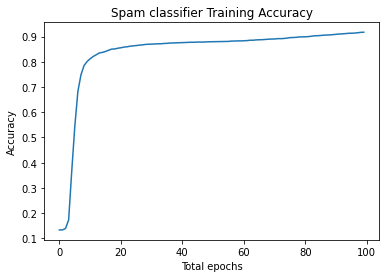

In [78]:
plt.plot(percep.accuracy)
plt.title("Spam classifier Training Accuracy")
plt.xlabel("Total epochs")
plt.ylabel("Accuracy")
plt.show()

In [79]:
max(percep.accuracy)    #train max.accuracy(92.28%)

0.9169845187345749

In [80]:
accuracy_score(ytest, pred)   #testing accuracy(91.47%)

0.9139013452914798